In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
import numpy as np

In [4]:
import seaborn as sns
import statsmodels.api as sm

In [5]:
data_2007 = pd.read_csv('E:/newassignment/2007.csv')
data_2008 = pd.read_csv('E:/newassignment/2008.csv')
data_planes =pd.read_csv('C:/Users/DELL/Downloads/plane-data.csv')

In [25]:
data_2007


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,NaN,0,0,0,0,0,0
7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,NaN,0,0,0,0,0,0
7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,NaN,0,0,0,15,0,0
7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,NaN,0,0,0,0,0,36


In [6]:
airline = pd.concat([data_2007,data_2008])
percent_missing = airline.isnull().sum() * 100 / len(airline)
missing_value_df = pd.DataFrame({'column_name': airline.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Year,Year,0.000000
Origin,Origin,0.000000
Cancelled,Cancelled,0.000000
Dest,Dest,0.000000
UniqueCarrier,UniqueCarrier,0.000000
CRSArrTime,CRSArrTime,0.000000
FlightNum,FlightNum,0.000000
CRSDepTime,CRSDepTime,0.000000
DayOfWeek,DayOfWeek,0.000000
DayofMonth,DayofMonth,0.000000


In [8]:
print('Hi')

Hi


In [ ]:
### We can see that the data has some amount of missing values in the last 5 columns. Cancellation Code column however has large amount of missing data
###therefore, we will discard it while we drop na's from the other columns.


Q1) >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [9]:
week_dict= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
m_dict= ['Jan','Feb','March','April','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

In [10]:

airline= airline.drop(columns="CancellationCode")
airline=airline.dropna()
non_cancel_airline = airline[(airline['Cancelled']==0)]
delays = non_cancel_airline[["Year","Month","DayOfWeek","ArrDelay"]].groupby(["DayOfWeek"])["ArrDelay"].mean()
delays_month = non_cancel_airline[["Year","Month","DayOfWeek","ArrDelay"]].groupby(["Month"])["ArrDelay"].mean()

In [105]:
dalay_time= non_cancel_airline[["DepTime","ArrDelay"]].groupby(["DepTime"])["ArrDelay"].mean()
delay_day=  non_cancel_airline[["DayofMonth","ArrDelay"]].groupby(["DayofMonth"])["ArrDelay"].mean()

In [108]:
frame3 = {"Delay":dalay_time}
frame4 = {"Day":day,"Delay":delay_day}
result3= pd.DataFrame(frame3)
result4=pd.DataFrame(frame4)

In [109]:
print(result3.min())
result3[1:300]

result4


Delay   -8.109861
dtype: float64


,Day,Delay
DayofMonth,,
1,1,15.415617
2,2,12.334033
3,3,12.224511
4,4,13.144108
5,5,13.645614
6,6,11.921419
7,7,11.725169
8,8,11.796710
9,9,12.009215


In [11]:
frame = {'Day':week_dict,"Delay":delays}
frame2 = {'Month':m_dict,"Delay":delays_month}
result = pd.DataFrame(frame)
result2 = pd.DataFrame(frame2)

In [19]:
print("The Day with lowest air delays is "+result.min()["Day"])
print("The Month with lowest air delays is "+result2.min()["Month"])
print(result2)

The Day with lowest air delays is Friday
The Month with lowest air delays is April
       Month      Delay
Month                  
1        Jan  18.457841
2        Feb  23.460048
3      March  19.413957
4      April  15.975471
5        May   7.037889
6        Jun  16.179528
7        Jul  14.107680
8        Aug  12.571533
9        Sep   3.749498
10       Oct   6.508259
11       Nov   4.793344
12       Dec  16.213714


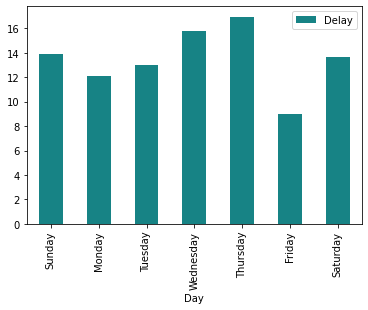

In [13]:
result.plot(kind='bar',x='Day',y='Delay',color="#178385")
plt.show()



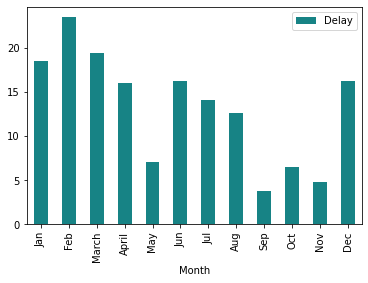

In [14]:
result2.plot(kind='bar',x='Month',y='Delay',color="#178385")
plt.show()

result4.plot(kind='bar',x='Day',y='Delay',color="#178385")
plt.show()

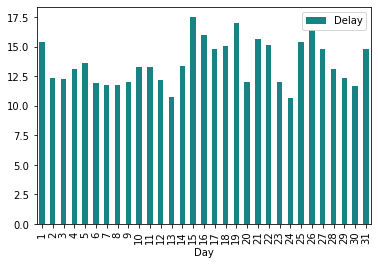

The Best day of the month seems to be:  Day       1.00000
Delay    10.69097
dtype: float64


Day       1.00000
Delay    10.69097
dtype: float64

In [113]:
result4.plot(kind='bar',x='Day',y='Delay',color="#178385")
plt.show()


# Explaination:
### The plot shows that friday is perhaps the best time to fly if you want to avoid any kind of Air Travel Delays and the best month to fly is September. The best Day of the month seems to be 24th and the hourly hours of the day seems to be the best hours to fly.


Q2 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [20]:
planes_data_cleaned = data_planes.dropna()
planes_data_cleaned[['tailnum','issue_date','year']]

,tailnum,issue_date,year
34,N10156,02/13/2004,2004
35,N102UW,05/26/1999,1998
36,N10323,07/01/1997,1986
37,N103US,06/18/1999,1999
38,N104UA,01/26/1998,1998
...,...,...,...
5024,N997DL,03/11/1992,1992
5025,N998AT,01/23/2003,2002
5026,N998DL,04/02/1992,1992
5027,N999CA,07/09/2008,1998


In [21]:
res = pd.merge(planes_data_cleaned[['tailnum',"issue_date"]],non_cancel_airline,left_on="tailnum",right_on="TailNum")

In [22]:
sorted = res[["tailnum","issue_date","ArrDelay"]].sort_values(by=['issue_date'])

In [23]:
issues_n = sorted[["ArrDelay","issue_date"]].groupby(["issue_date"])["ArrDelay"].max

In [24]:
issues = issues_n()

In [25]:
issues_p = pd.DataFrame({'Average_Delay':issues})

<function matplotlib.pyplot.show(close=None, block=None)>

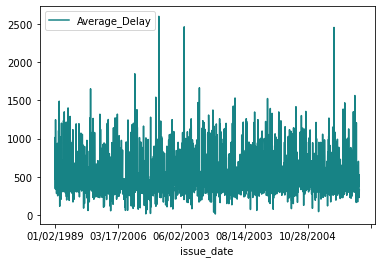

<Figure size 288x360 with 0 Axes>

In [26]:
issues_p.plot(kind='line',color="#178385")
plt.figure(figsize=(4, 5))
plt.show

# Explaination:
### The graph shows a highly gradual decline in the maximum arrival delay time for each day which translates older planes that have been issued earlier suffer more delays than newer planes

Q3 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [27]:
airline['YearMonth'] = airline['Month'].astype(str)+'/'+airline['Year'].astype(str)

In [28]:
airline['YearMonth']

0          1/2007
1          1/2007
2          1/2007
3          1/2007
4          1/2007
            ...  
2389181    4/2008
2389182    4/2008
2389191    4/2008
2389193    4/2008
2389197    4/2008
Name: YearMonth, Length: 7859870, dtype: object

In [30]:
airline['Month_Year'] = pd.to_datetime(airline['YearMonth'])

In [31]:
avg_travel = airline[['Month_Year','Distance']].groupby(['Month_Year'])['Distance'].mean
avg_travel_s = avg_travel()

In [32]:
agg_travel = airline[['Month_Year','Distance']].groupby(['Month_Year'])['Distance'].sum
agg_travel_s = agg_travel()

In [33]:
count_travel = airline[['Month_Year','Distance']].groupby(['Month_Year'])['Distance'].count
count_travel_s = count_travel()

In [34]:
new_res = pd.DataFrame({'Average_tr_dist':avg_travel_s,'Total_tr_dist':agg_travel_s,'Flight_counts':count_travel_s})

<AxesSubplot:xlabel='Month_Year'>

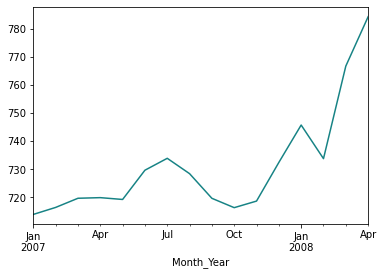

In [35]:
new_res['Average_tr_dist'].plot(kind='line',color="#178385")

<AxesSubplot:xlabel='Month_Year'>

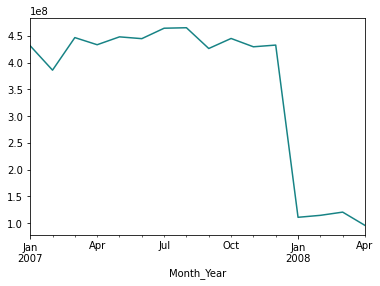

In [36]:
new_res['Total_tr_dist'].plot(kind='line',color="#178385")

<AxesSubplot:xlabel='Month_Year'>

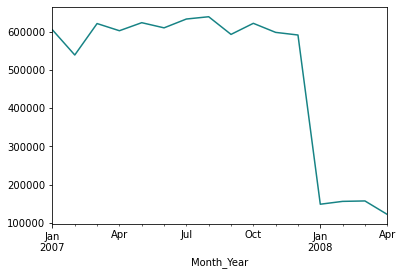

In [37]:
new_res['Flight_counts'].plot(kind='line',color="#178385")

# Explainations:
### From the three graphs above we can see that average distance traveled has been increasing but the total number of people flying has been decreasing with a peak in August 2007, after which we can see that in the third graph, the count of flights have been decreasing rapidly.

Q4 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [38]:
airline_dep_d = airline[airline.DepDelay > 0]
airline_arr_d = airline_dep_d[airline_dep_d.ArrDelay > 0]

In [39]:
print ('cascading failures in percentage: ', round(airline_arr_d.shape[0]/airline_dep_d.shape[0]*100,5),"%")

cascading failures in percentage:  80.84928 %


# Explaination:
There is a 80.849% chance that delay on the departure airport will create a delay on the arrival airport as well, therefore cascading faliures do seem to exist. 

In [40]:
airline_sample = airline.sample(frac=0.05)

In [41]:
airline_sample.drop('TaxiIn', inplace=True, axis=1)
airline_sample.drop('TaxiOut', inplace=True, axis=1)

print('discarded TaxiIn, TaxiOut')

discarded TaxiIn, TaxiOut


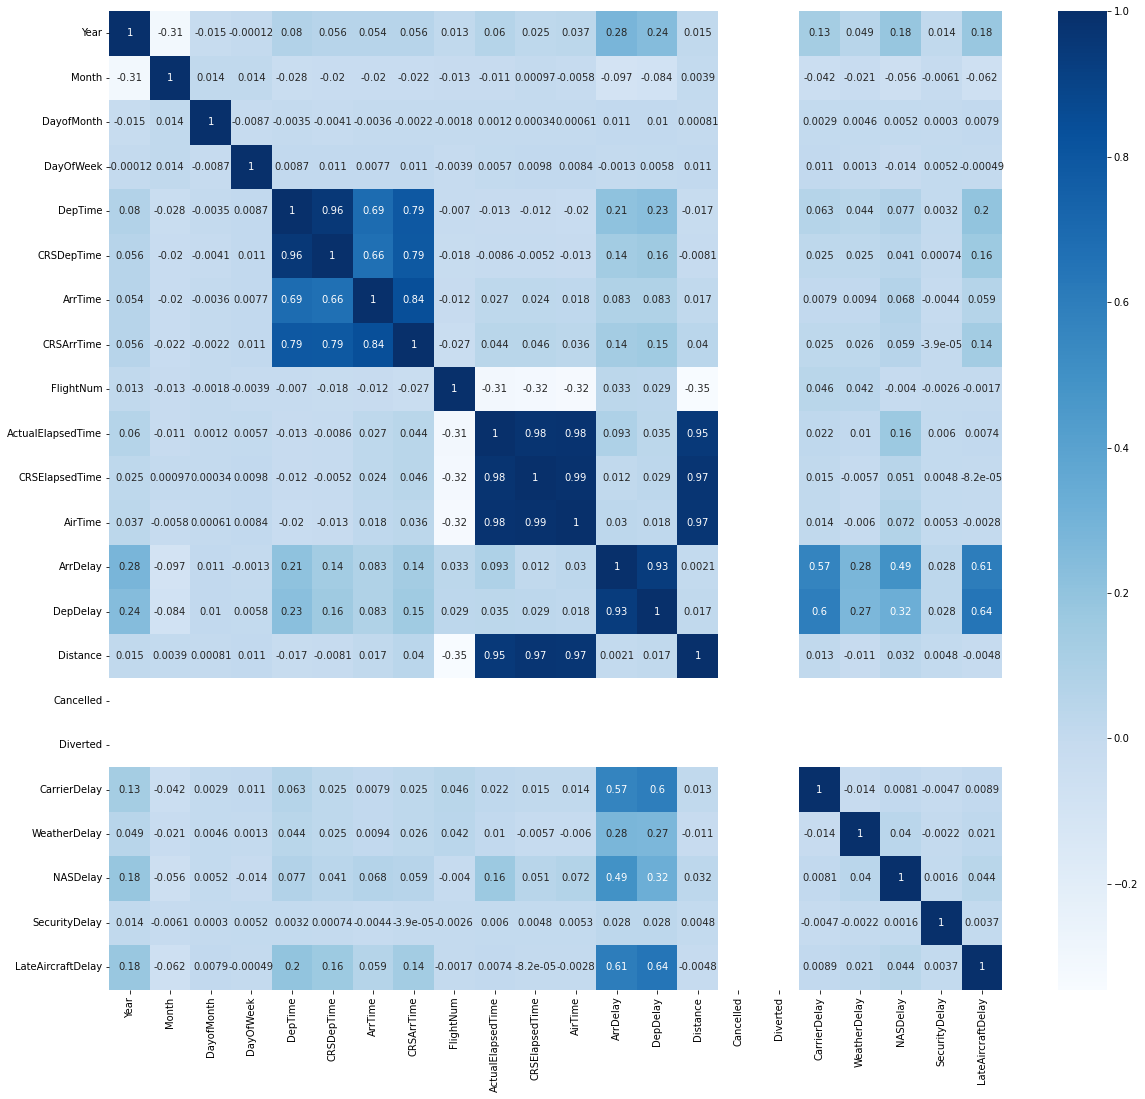

In [42]:
plt.figure(figsize=(20,18))
corrMatrix = airline_sample.corr()
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Blues)
plt.show()

In [58]:
cor_target = abs(corrMatrix["ArrDelay"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

Year                 0.282771
DepTime              0.206516
ArrDelay             1.000000
DepDelay             0.934003
CarrierDelay         0.565417
WeatherDelay         0.277544
NASDelay             0.492629
LateAircraftDelay    0.605231
Name: ArrDelay, dtype: float64

In [61]:
Data_Filtered = airline_sample[['DepDelay','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay','ArrDelay']]

In [62]:
Data_Filtered = Data_Filtered.dropna()

In [63]:
x = Data_Filtered[['DepDelay','CarrierDelay', 'WeatherDelay', 'NASDelay','LateAircraftDelay']]
y = Data_Filtered[['ArrDelay']]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[[0.16775136 0.86184373 0.86586033 0.94830253 0.86513987]]


In [67]:
print(model.intercept_)

[-3.81326047]


In [68]:
predictions = model.predict(x_test)

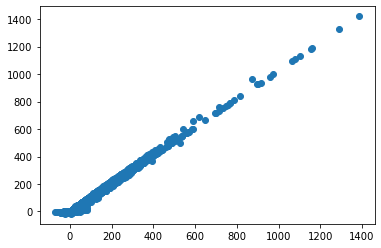

In [69]:
plt.scatter(y_test, predictions)

In [70]:
from sklearn import metrics

In [71]:
metrics.mean_absolute_error(y_test, predictions)

6.271173386250373

In [72]:
metrics.mean_squared_error(y_test, predictions)

69.25504092761277

In [73]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.321961363020906

In [74]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9600289806680561


In [75]:
 y_pred = model.predict(x_train)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[-0.29048181]
 [-4.1487632 ]
 [-4.48426592]
 ...
 [-4.65201729]
 [-4.48426592]
 [-4.48426592]]


In [77]:
predictions = model.predict(x_test)

In [78]:
predictions

array([[211.402125  ],
       [ -3.98101183],
       [ -3.47775774],
       ...,
       [ -5.15527138],
       [ -4.1487632 ],
       [117.22638873]])

(array([1.0000e+00, 3.0000e+00, 4.9000e+01, 6.9000e+02, 1.2083e+04,
        8.2521e+04, 2.2506e+04, 3.3000e+01, 9.0000e+00, 4.0000e+00]),
 array([-92.53360942, -76.12415821, -59.714707  , -43.3052558 ,
        -26.89580459, -10.48635338,   5.92309782,  22.33254903,
         38.74200024,  55.15145144,  71.56090265]),
 <BarContainer object of 10 artists>)

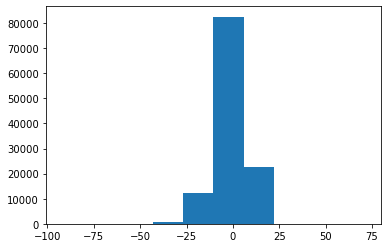

In [80]:
plt.hist(y_test - predictions)